In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# set to be lower priority
os.nice(1) 

1

In [3]:
import pandas  as pd
from cdcp.paths import DATA_DIR, ensure_dir
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pathlib2 import Path
from tqdm.autonotebook import tqdm
pd.set_option('display.max_columns', 500)
from joblib import Parallel, delayed

/home/AD/tsainbur/anaconda3/envs/cdcp_paper/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import sys


In [4]:
from datetime import datetime

In [5]:
from cdcp.spiketrain_analysis.unit_statistics import get_unit_spike_trains

In [6]:
# "2021-10-07_16-05-58_796914" '2021-10-06_13-30-08_899062' '2021-10-01_17-02-56_744915' 
statistics_timestamp = '2021-10-23_23-02-31_846685'# datetime.now().strftime("%Y-%m-%d_%H-%M-%S_%f")#
statistics_timestamp

'2021-10-23_23-02-31_846685'

In [7]:
birds = [
    ('B1597', '2021-05-14_12-40-20_423998', 'kilosort2_5'),
    ('B1188', '2021-05-31_18-52-29_558216', 'kilosort2_5'),
    ('B1595', '2021-07-10_16-42-47_090257', 'kilosort2'),
    ('B1276', '2021-07-14_11-14-02_257025', 'kilosort2'),
    ('B1426', '2021-07-14_11-29-39_657273', 'kilosort2'),
    ('B1432', '2021-06-01_15-14-38_561892', 'kilosort2_5'),
    ('B1170', '2021-06-01_21-01-26_519005', 'kilosort2_5'),
    ('B1244', '2021-07-14_12-57-45_546674', 'kilosort2'),
    ('B1593', '2021-06-28_18-13-24_826008', 'kilosort2_5'),
    ('B1248', '2021-07-03_18-08-01_063431', 'kilosort2_5'),
    # acute
    ('B1279', '2021-04-12_16-27-07_289527', 'kilosort2_5'),
    ('B1500', '2021-08-27_09-24-48_680961', 'kilosort2_5'),
    ('B1239', '2021-05-17_22-18-51_557635', 'kilosort2'),
    ('B1459', '2021-08-26_21-21-12_755614', 'kilosort2_5'),
]

In [8]:
min_playbacks = 1000

### Compute spike vectors and statistics

In [9]:
identifier = "spike_count"

In [10]:
def get_unit_statistic(
    unit_to_analyze,
    spikesorting_folder,
    statistics_timestamp,
    identifier=identifier,
    recompute=False,
    parallel=True,
    n_interp_point_bins=16,
    n_time_bins=25,
    include_passive=True,
    flip_bins=True,
    save=True,
    plot=False,
):
    def run():

        unit_series_save_loc = (
            spikesorting_folder
            / "unit_statistics"
            / statistics_timestamp
            / identifier
            / "{}.pickle".format(unit_to_analyze.cluster_id)
        )

        # check if we need to run everything
        if unit_series_save_loc.exists() and (recompute is False):
            print("neurometric already exists")
            return

        # make sure folder exists
        ensure_dir(unit_series_save_loc)

        unit_series_list = []
        # load spike trains
        trial_aligned_spikes = get_unit_spike_trains(
            unit_to_analyze.sort_units, spikesorting_folder, sorter, unit_to_analyze
        )
        if trial_aligned_spikes is None:
            #breakme
            # because there are not enough spikes for this unit to be worth it
            print("no trial_aligned_spikes") 
            return


        # count statistics
        statistic_series = pd.Series(
            {
                "n_trials": len(trial_aligned_spikes),
                "n_cued_trials": np.sum(
                    np.array(trial_aligned_spikes.response.isnull() == False)
                    & (
                        trial_aligned_spikes.cue.isin(
                            ["CR1", "CR0", "CN", "CL0", "CL1"]
                        ).values
                    )
                ),
                "n_incorrect_trials": np.sum(trial_aligned_spikes["correct"] == False),
                "n_correct_trials": np.sum(trial_aligned_spikes["correct"] == True),
                "n_reward_trials": np.sum(trial_aligned_spikes["reward"] == True),
                "n_passive_trials": np.sum(trial_aligned_spikes["passive"] == True),
                "n_active_trials": np.sum(trial_aligned_spikes["passive"] == False),
                "n_spikes": np.sum([len(i) for i in trial_aligned_spikes.spike_times.values]),
            }
        )

        if statistic_series is not None:
            unit_series_list.append(statistic_series)

        # skip if no data is available
        if len(unit_series_list) == 0:
            return

        # save final row
        unit_series = pd.concat(unit_series_list)

        if save:
            unit_series.to_pickle(unit_series_save_loc)
        
        return unit_series

    if parallel == False:
        run()
    else:
        try:
            run()
        except Exception as e:
            with open("error_log.txt", "w") as text_file:
                text_file.write(str(e))
            raise ValueError(unit_to_analyze.cluster_id)

  0%|          | 0/14 [00:00<?, ?it/s]

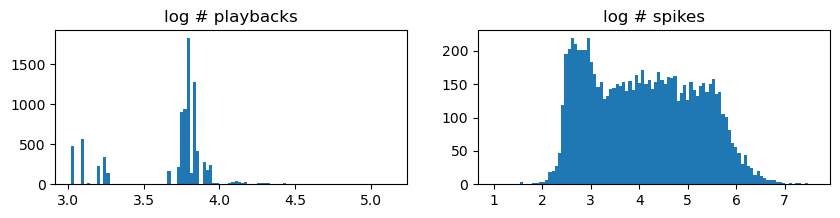

B1597 total # merged units: 8711


unit:   0%|          | 0/8711 [00:00<?, ?it/s]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   25.6s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:   28.8s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:   30.2s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   31.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   31.7s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:   32.5s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   33.1s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:   33.6s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:   34.2s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:   34.8s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:   35.3s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:   35.9s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   36.4s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:   36.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   37.4s
[Parallel(

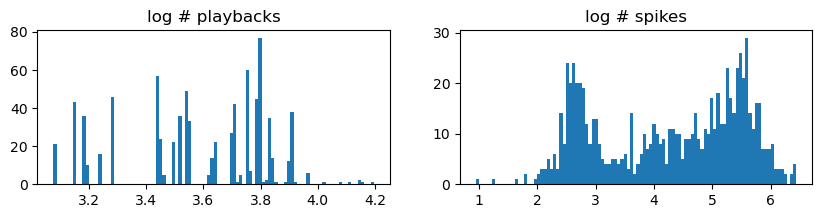

B1188 total # merged units: 821


unit:   0%|          | 0/821 [00:00<?, ?it/s]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Batch computation too fast (0.1339s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Batch computation too fast (0.1192s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  19 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 100 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 144 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 248 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 308 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 368 tasks      | elapsed:    2.5s
[Parallel(n_jobs=8)]: Done 436 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 50

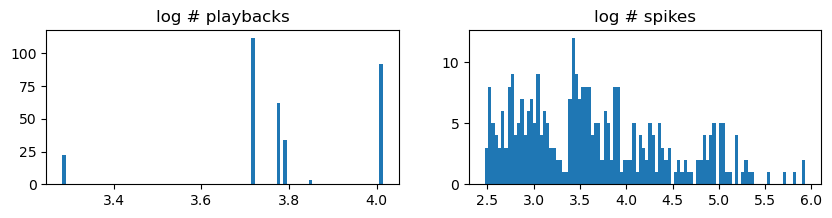

B1595 total # merged units: 325


unit:   0%|          | 0/325 [00:00<?, ?it/s]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Batch computation too fast (0.0309s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Batch computation too fast (0.1952s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 100 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 144 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 196 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 248 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 296 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 325 out of 325 | elapsed:    2.7s finished


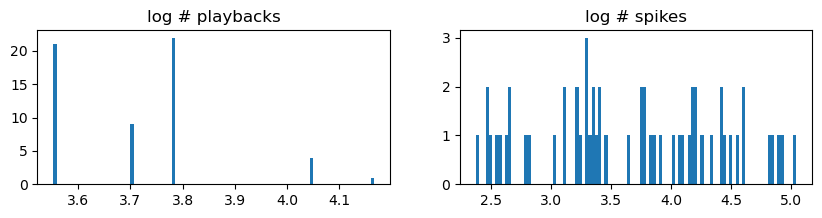

B1276 total # merged units: 57


unit:   0%|          | 0/57 [00:00<?, ?it/s]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Batch computation too fast (0.1529s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.1659s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  42 out of  57 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=8)]: Done  48 out of  57 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  54 out of  57 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  57 out of  57 | elapsed:    0.6s finished


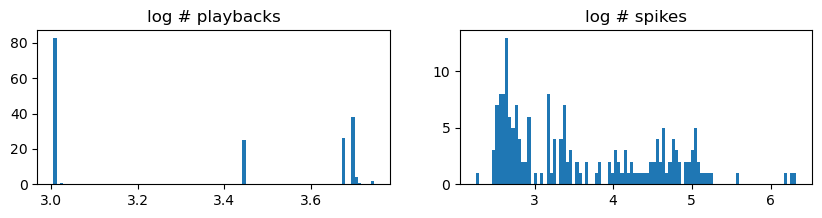

B1426 total # merged units: 180


unit:   0%|          | 0/180 [00:00<?, ?it/s]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Batch computation too fast (0.0676s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Batch computation too fast (0.0771s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.1018s.) Setting batch_size=8.
[Parallel(n_jobs=8)]: Done  62 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 104 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Batch computation too fast (0.1550s.) Setting batch_size=16.
[Parallel(n_jobs=8)]: Done 108 out of 180 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=8)]: Done 146 out of 180 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=8)]: Done 180 out of 180 | elapsed:    0.8s finished


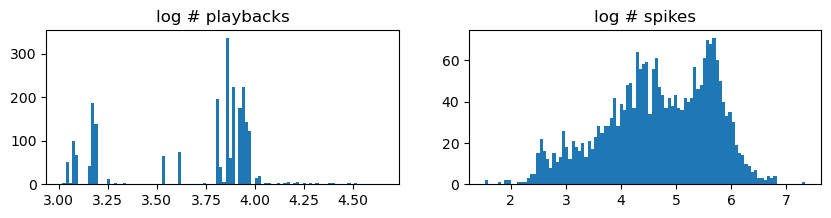

B1432 total # merged units: 2364


unit:   0%|          | 0/2364 [00:00<?, ?it/s]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    3.1s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    3.4s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    3.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    4.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    4.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    4.6s
[Parallel(

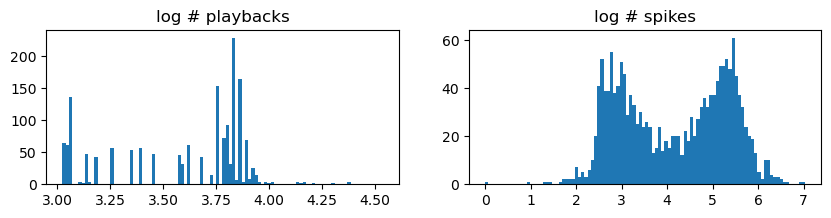

B1170 total # merged units: 1693


unit:   0%|          | 0/1693 [00:00<?, ?it/s]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Batch computation too fast (0.1944s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Batch computation too fast (0.1087s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done 138 tasks      | elapsed:    3.1s
[Parallel(n_jobs=8)]: Done 19

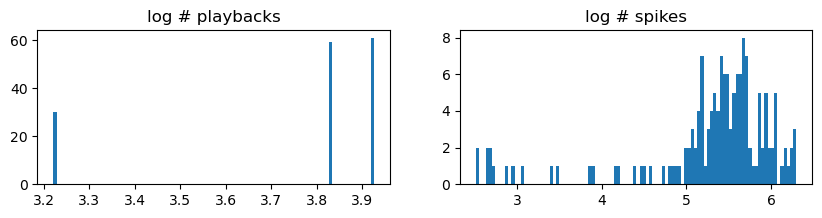

B1244 total # merged units: 150


unit:   0%|          | 0/150 [00:00<?, ?it/s]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Batch computation too fast (0.1236s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done  74 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done  96 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 122 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    1.9s finished


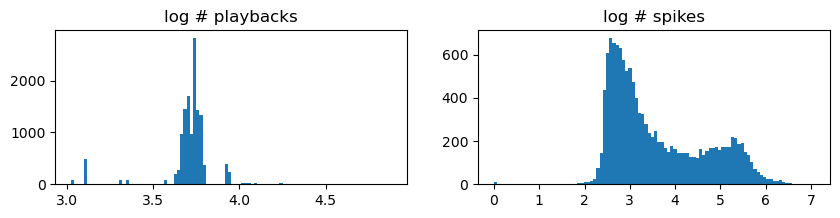

B1593 total # merged units: 13260


unit:   0%|          | 0/13260 [00:00<?, ?it/s]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    3.5s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    3.9s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    4.3s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    4.8s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    5.3s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    5.6s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    6.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    6.5s
[Parallel(

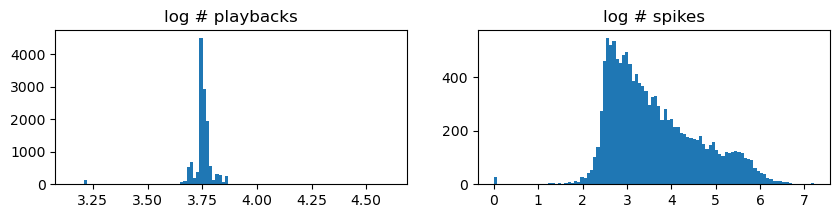

B1248 total # merged units: 13184


unit:   0%|          | 0/13184 [00:00<?, ?it/s]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    3.6s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    3.9s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    4.3s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    4.8s
[Parallel(n_jobs=8)]: Batch computation too fast (0.1930s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    5.0s
[Parallel(n_jobs=8)]: Done 178 tasks      | elapse

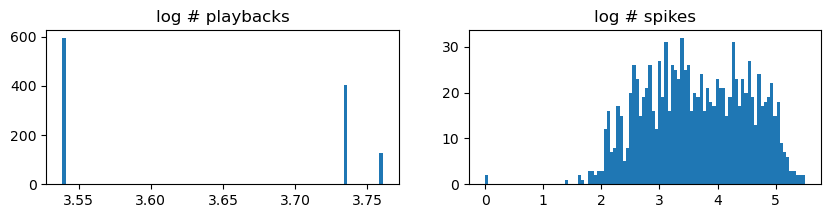

B1279 total # merged units: 1126


unit:   0%|          | 0/1126 [00:00<?, ?it/s]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Batch computation too fast (0.0403s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Batch computation too fast (0.1060s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 100 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 144 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 196 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 248 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 308 tasks      | elapsed:    2.5s
[Parallel(n_jobs=8)]: Done 368 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 436 tasks      | elapsed:    3.5s
[Parallel(n_jobs=8)]: Done 50

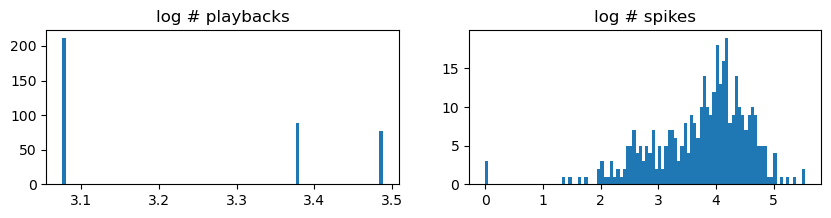

B1500 total # merged units: 377


unit:   0%|          | 0/377 [00:00<?, ?it/s]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Batch computation too fast (0.0375s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Batch computation too fast (0.1507s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Batch computation too fast (0.1504s.) Setting batch_size=8.
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 176 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 280 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 377 out of 377 | elapsed:    1.7s finished


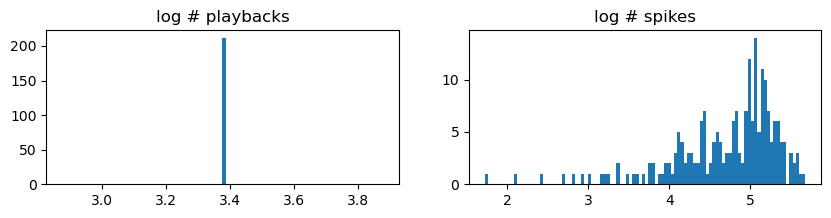

B1239 total # merged units: 212


unit:   0%|          | 0/212 [00:00<?, ?it/s]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Batch computation too fast (0.0696s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Batch computation too fast (0.1775s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 144 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 197 out of 212 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=8)]: Done 212 out of 212 | elapsed:    1.5s finished


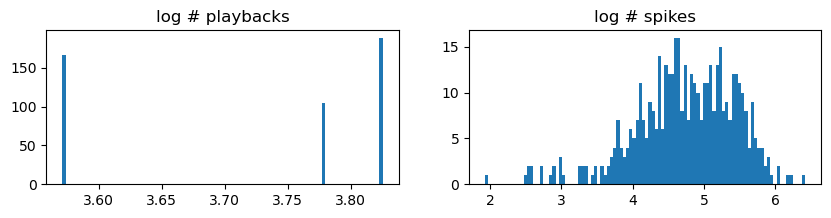

B1459 total # merged units: 460


unit:   0%|          | 0/460 [00:00<?, ?it/s]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Batch computation too fast (0.1972s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done  92 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 122 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 152 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 186 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 220 tasks      | elapsed:    3.4s
[Parallel(n_jobs=8)]: Done 258 tasks      | elapse

In [11]:
for bird, timestamp, sorter in tqdm(birds):
    spikesorting_folder = (DATA_DIR
                / "spikesorting"
                / bird
                / timestamp)
    recording_summary_df = pd.read_pickle(spikesorting_folder/ 'recording_df.pickle')

    # get units that are to be merged
    merged_units = pd.read_pickle(spikesorting_folder / 'unit_clusters2.pickle')
    merged_units = merged_units.sort_values(by='n_playbacks', ascending=False)
    merged_units = merged_units[merged_units.n_playbacks.astype('float')  > min_playbacks]
    
    plot = True
    if plot:
        fig, axs = plt.subplots(ncols=2, figsize=(10,2))
        axs[0].hist(np.log10(merged_units.n_playbacks.values.astype('float')+1), bins = 100);
        axs[0].set_title('log # playbacks')
        axs[1].hist(np.log10(merged_units.n_spikes.values.astype('float')+1), bins = 100);
        axs[1].set_title('log # spikes')
        plt.show()
        print('{} total # merged units: {}'.format(bird, len(merged_units)))

    ensure_dir(spikesorting_folder / 'unit_statistics' / statistics_timestamp)

    
    Parallel(n_jobs = 8, verbose=10)(
        delayed(get_unit_statistic)(
            unit_to_analyze,
            spikesorting_folder,
            statistics_timestamp,
            recompute=True,
            parallel=True,
            n_interp_point_bins=16,
            
                    )
        for uniti, unit_to_analyze in tqdm(
            merged_units.iterrows(), desc="unit", total=len(merged_units)
        )
    );

### Debugging

In [12]:
breakme

NameError: name 'breakme' is not defined

In [ ]:
np.where(merged_units.cluster_id == 387)

In [ ]:
Parallel(n_jobs=1, verbose=10)(
    delayed(get_unit_statistic)(
        unit_to_analyze,
        spikesorting_folder,
        statistics_timestamp,
        recompute=True,
        parallel=False,
        save=False,
        plot=False,
    )
    for uniti, unit_to_analyze in tqdm(
        merged_units[:]
        .iterrows(), desc="unit", total=len(merged_units)
    )
)

In [ ]:
%debug

### make dataframe

In [13]:
ensure_dir(DATA_DIR / 'unit_statistics' / statistics_timestamp / identifier)

In [14]:
def read_and_unit(i):
    try:
        df = pd.read_pickle(i)
        df['unit'] = i.stem
        return df
    except:
        return

In [15]:
for bird, timestamp, sorter in tqdm(birds):
    print(bird)
    spikesorting_folder = DATA_DIR / "spikesorting" / bird / timestamp
    recording_summary_df = pd.read_pickle(spikesorting_folder / "recording_df.pickle")

    unit_series_save_loc = (
        spikesorting_folder / "unit_statistics" / statistics_timestamp / identifier
    )
    unit_pickles = list(unit_series_save_loc.glob("*.pickle"))
    if len(unit_pickles) == 0:
        print('\t no units')
        continue
    unit_statistics_df = pd.concat(
        Parallel(n_jobs=-1, prefer="threads")(
            delayed(read_and_unit)(i)
            for i in tqdm(unit_pickles, leave=False, desc="reading pickles")
        ),
        axis=1,
    ).T

    unit_statistics_df.to_pickle(
        DATA_DIR
        / "unit_statistics"
        / statistics_timestamp
        / identifier
        / "{}.pickle".format(bird)
    )

  0%|          | 0/14 [00:00<?, ?it/s]

B1597


reading pickles:   0%|          | 0/6750 [00:00<?, ?it/s]

B1188


reading pickles:   0%|          | 0/510 [00:00<?, ?it/s]

B1595


reading pickles:   0%|          | 0/242 [00:00<?, ?it/s]

B1276


reading pickles:   0%|          | 0/46 [00:00<?, ?it/s]

B1426


reading pickles:   0%|          | 0/93 [00:00<?, ?it/s]

B1432


reading pickles:   0%|          | 0/2157 [00:00<?, ?it/s]

B1170


reading pickles:   0%|          | 0/1281 [00:00<?, ?it/s]

B1244


reading pickles:   0%|          | 0/141 [00:00<?, ?it/s]

B1593


reading pickles:   0%|          | 0/7714 [00:00<?, ?it/s]

B1248


reading pickles:   0%|          | 0/8698 [00:00<?, ?it/s]

B1279


reading pickles:   0%|          | 0/827 [00:00<?, ?it/s]

B1500


reading pickles:   0%|          | 0/307 [00:00<?, ?it/s]

B1239


reading pickles:   0%|          | 0/206 [00:00<?, ?it/s]

B1459


reading pickles:   0%|          | 0/447 [00:00<?, ?it/s]

In [ ]:
unit_series_save_loc